# Classifying handwritten digits

Here we use SVM's to classify the values of images of handwritten digits.
We iterate over different Gaussian kernels in order to optimize the SVM's performance.

In [12]:
# import relevant libraries, datasets of interest, classifiers, and performance metrics
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
digits = datasets.load_digits();

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
[0 1 2 ..., 8 9 8]


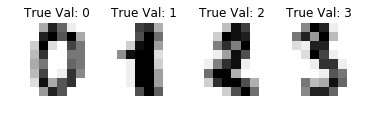

In [13]:
# output features of digits dataset
print digits.data
# output the true value of the digit represented by the features in digits.data
print digits.target
# output the image of the first few digits and theur true values, as an example
i = 4;
imageList = list(zip(digits.images[:i], digits.target[:i]));
for j, (image, label) in enumerate(imageList):
    plt.subplot(1, i, j+1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('True Val: %i' % label)
plt.show()

In [14]:
# import datasets, classifiers and performance metrics
nDigit = len(digits.images);
print 'Number of digits = %i' % nDigit
# reshape digits.images into a matrix
# each image is an 8x8 of pixels so reshape into a matrix with nDigit rows and 64 columns
digitMatrix = digits.images.reshape((nDigit,-1));
digitMatrix.shape

Number of digits = 1797


(1797, 64)

In [15]:
# make classifier with SVM using a gaussian kernel
classifier = svm.SVC( kernel='rbf', gamma=0.01)

In [16]:
# train the classifier using about 60% of images
nTrain = int(nDigit * 0.6);
classifier.fit(digitMatrix[:nTrain], digits.target[:nTrain]);

In [17]:
# predict reamining digit values using classifier
testTrue = digits.target[nTrain:];
testPred = classifier.predict(digitMatrix[nTrain:]);

In [18]:
print('Classification report for classifier %s:\n%s\n'
      % (classifier, metrics.classification_report( testTrue, testPred)))
print('Confusion matrix:\n%s' % metrics.confusion_matrix( testTrue, testPred))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.62      0.77        71
          1       1.00      0.66      0.79        73
          2       1.00      0.55      0.71        71
          3       1.00      0.68      0.81        74
          4       1.00      0.76      0.86        74
          5       1.00      0.89      0.94        71
          6       1.00      0.55      0.71        74
          7       1.00      0.54      0.70        72
          8       0.24      1.00      0.39        68
          9       1.00      0.79      0.88        71

avg / total       0.93      0.70      0.76       719


Confusion matrix:
[[44  0  0  0  0  0  0  0 27  0]
 [ 0 48  0  0  0  0  0  0 25  0]
 [ 0  0 39  0  0

As shown above, the current classifier does not do that good of a job predicting the digits. In particular, the '8' digit has the worst performance.

Lets look at a few examples of the digit images and their corresponding predicted values.

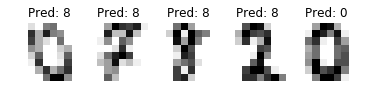

In [19]:
i = 5;
imageList = list(zip(digits.images[nTrain:nTrain+i], testPred[:i]));
for j, (image, label) in enumerate(imageList):
    plt.subplot(1, i, j+1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Pred: %i' % label)
plt.show();
nTest = len(testPred);

Lets find a gamma value that has the best performance in terms of F1 score.

In [20]:
gammaList = [ 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001];
f1_best   = 0.0;
testTrue  = digits.target[nTrain:];

for g in gammaList:
    classifier = svm.SVC( kernel='rbf', gamma=g);
    classifier.fit(digitMatrix[:nTrain], digits.target[:nTrain]);

    pred_trial = classifier.predict(digitMatrix[nTrain:]);
    f1_trial   = metrics.f1_score( testTrue, pred_trial, average='macro')

    if f1_trial > f1_best:
        gamma_best = g;
        f1_best   = f1_trial;
        pred_best = pred_trial;

In [21]:
# output info of the best classifier
print 'Best Gamma = %.4f \n' %gamma_best
print('Classification report for classifier %s:\n%s\n'
      % (classifier, metrics.classification_report( testTrue, pred_best)))
print('Confusion matrix:\n%s' % metrics.confusion_matrix( testTrue, pred_best))

Best Gamma = 0.0010 

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        71
          1       0.99      0.96      0.97        73
          2       0.99      0.97      0.98        71
          3       0.97      0.84      0.90        74
          4       0.99      0.96      0.97        74
          5       0.95      0.99      0.97        71
          6       0.99      0.99      0.99        74
          7       0.95      1.00      0.97        72
          8       0.92      1.00      0.96        68
          9       0.95      0.97      0.96        71

avg / total       0.97      0.97      0.96       719


Confusion matrix:
[[70  0  0  0  1  0  0  0  0  0]
 [ 0 70  1  0  0  0  0  0

As shown above, the F1 score improved to 0.96.
Lets take a look at the same few examples to see how they fare now.

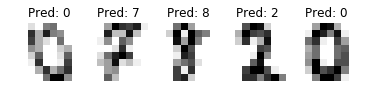

In [22]:
# we see that the optimized value of gamma is much better at predicting the digits
i = 5;
imageList = list(zip(digits.images[nTrain:nTrain+i], pred_best[:i]));
for j, (image, label) in enumerate(imageList):
    plt.subplot(1, i, j+1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Pred: %i' % label)
plt.show();